<h1><u>Life Expectancy</u></h1><hr color='blue'>
<i>This project is built by Siddharth kajle under guidence of Smartinternz</i>

<h3>Theory</h3>  <p>
This is the problem of regression in machine learning ,so directly move to probelm make our work critical.First we have follow the steps of data science to get certain mean square error.  </p>
<b>Steps involved :</b>
<ol><li>Data Understanding</li><li>Data Visualisation</li><li>Data preposition</li><li>Modeling</li><li>Evalution</li></ol>

<hr style="border-top: 1px solid #0000;">

## 1. Data Understanding :  
<br>
Load the file 

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c308db4c30f64f5985f9f7eefd3b8141 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4Lr1vPsQpoE6XCRaNeARF5MoE0keTxI1Vowpk7pxRonQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c308db4c30f64f5985f9f7eefd3b8141.get_object(Bucket='smartinternz-donotdelete-pr-fpm5xsspf9dvfu',Key='life.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

## 2. Data preprocessing

<h3>By this we can conclude </h3><br><font color='red'><b>some values are missing in data set</b></font>

<h3>Solution to missing values</h3>  
Data filling take place is next cell it is depend on the nature of the data.

In [3]:
data['Life expectancy '].fillna( method ='ffill', inplace = True)
data['Adult Mortality'].fillna( method ='ffill', inplace = True)
data['Alcohol'] = data['Alcohol'].fillna(data.groupby('Country')['Alcohol'].transform('mean'))
data['Hepatitis B']=data['Hepatitis B'].fillna(data.groupby('Country')['Hepatitis B'].transform('median'))
data['Diphtheria '] = data['Diphtheria '].fillna(data.groupby('Country')['Diphtheria '].transform('mean'))
data['Total expenditure']=data['Total expenditure'].fillna(data.groupby('Country')['Total expenditure'].transform('median'))
data['Schooling'].fillna( 1.199279, inplace = True)
data['Income composition of resources'].fillna( 0.627551, inplace = True)
data['Total expenditure'].fillna( 3.6, inplace = True)
data['Alcohol'].fillna( 0.001, inplace = True)
data['Hepatitis B'].fillna( 0.003, inplace = True)
data[' BMI '].fillna(21.0,inplace=True)
data['Polio'].fillna(0.03,inplace=True)
data[' thinness  1-19 years'].fillna(4.839704,inplace=True)
data[' thinness 5-9 years'].fillna(4.870317,inplace=True)


GDP and Population has many value missing ,also contain big value diffrence so apply interpolation.

In [4]:
country_list = data.Country.unique()
fill_list = ['GDP','Population']
for country in country_list:
    data.loc[data['Country'] == country,fill_list] = data.loc[data['Country'] == country,fill_list].interpolate()


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

In [6]:
data['GDP'].fillna(7413.645004 , inplace = True)

data['Population'].fillna(9924.796 , inplace = True)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

<font color='green'><b>Now no missing value is there in data set.</b></font>

In [8]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.195643,164.816542,30.303948,4.574233,738.251295,75.639698,2419.592240,38.120796,42.035739,82.016532,5.893965,82.183944,1.742103,7413.645004,9.925353e+06,4.839704,4.870317,0.627551,11.393970
std,4.613841,9.536654,124.433748,117.926501,4.042368,1987.914858,29.861994,11467.272489,20.013628,160.445548,24.271179,2.480962,23.743205,5.077785,13152.080417,5.407545e+07,4.394535,4.482708,0.204820,4.094274
min,2000.000000,36.300000,1.000000,0.000000,0.001000,0.000000,0.003000,0.000000,1.000000,0.000000,0.030000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.025000,74.000000,0.000000,0.852500,4.685343,68.000000,0.000000,19.400000,0.000000,77.000000,4.210000,78.000000,0.100000,563.517201,9.924796e+03,1.600000,1.600000,0.504250,9.500000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,89.000000,17.000000,43.000000,4.000000,93.000000,5.700000,93.000000,0.100000,2874.075216,5.393575e+05,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,228.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.457500,97.000000,0.800000,7413.645004,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<h3>By this we determine that data contain un noramlised values</h3> 

<font color='red'><b>Unnormalised Data<b></font>

Due to data normalised, computational speed is increased.

In [9]:
# We can increase the speed by normalise the life expectancy 


## 3.Data Visualization

In [10]:
cols=list(data.columns)
print(cols)

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


<b>Creating heat maps</b>

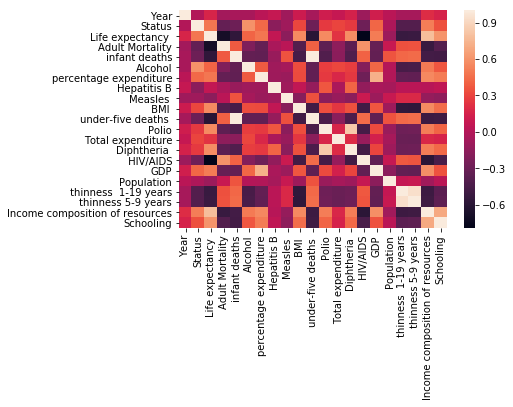

In [23]:
import seaborn as sns
import matplotlib.pyplot as plot
plot.show(sns.heatmap(data.corr()))

<font color='red'><b>In depended feature</b></font>  
Our output is "Life expectancy" so track the column which are depened on it.
These are "HIV/AIDS" ,"Adult Morality" ,"Thinness 1-19","Thinness 5-9"

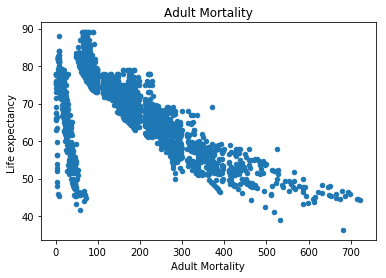

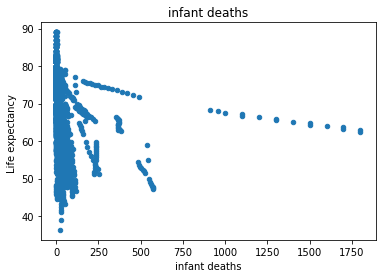

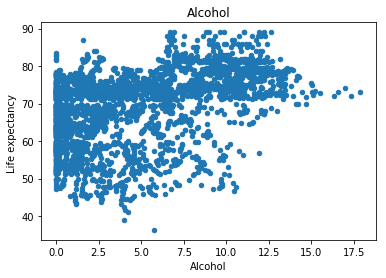

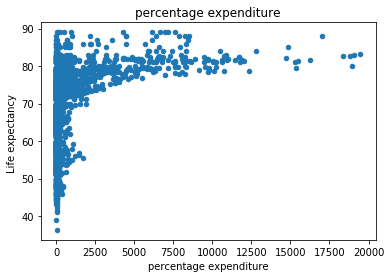

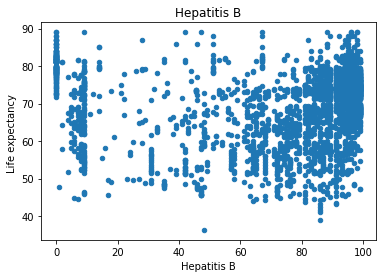

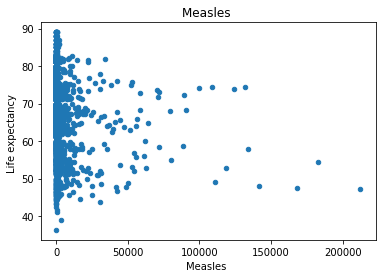

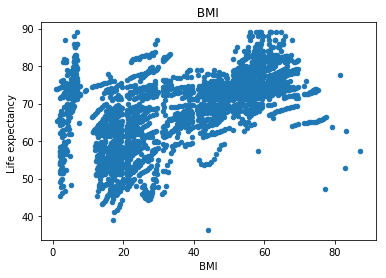

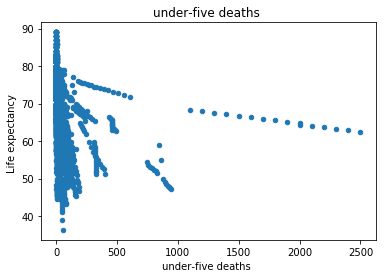

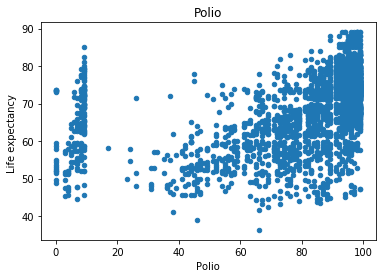

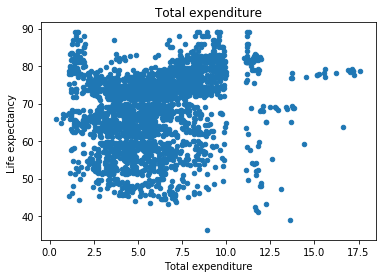

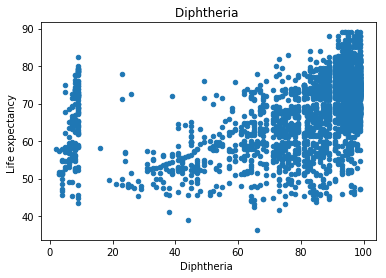

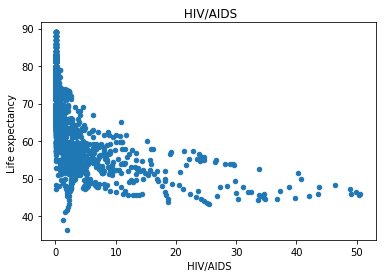

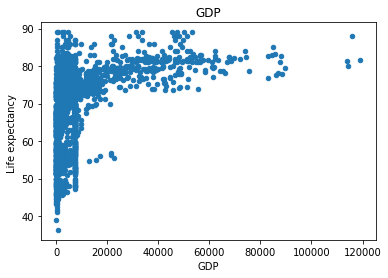

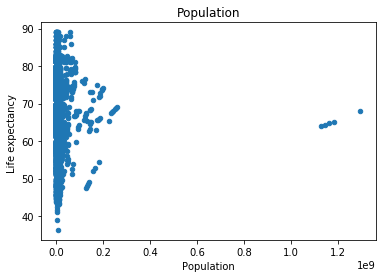

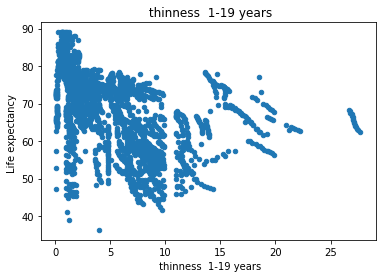

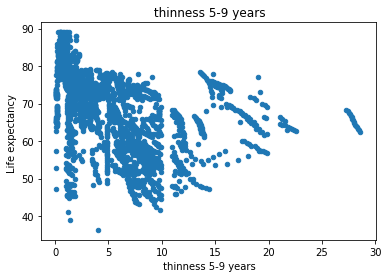

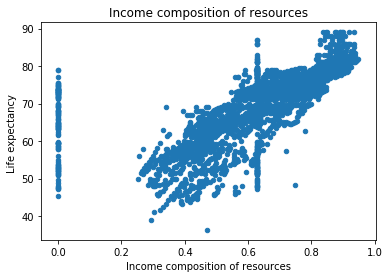

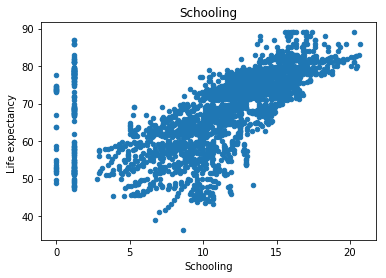

In [12]:
for i in cols[4:]:
    data.plot.scatter(x=i, y='Life expectancy ', title= f"{i}")
    plot.show(block=True)

<b><font color='green'>Variable which are independent will remove</font><b>  
('Alcohol','Measles ', 'Hepatitis B','Population', 'Total expenditure') these should be remove.

<b><font color='red'>Charater features</font><b>  
    ('Country' and 'Status') should be changed.

In [13]:
data['Status']=pd.get_dummies(data['Status'])['Developed']
data['Status'] = data['Status'].astype(float)

<b><font color='green'>All the features are change into numberical</font><b>
    <br><hr><br><b><font color='red'>Checking for outliers</font><b>

<b></b>

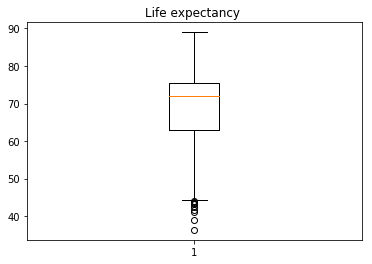

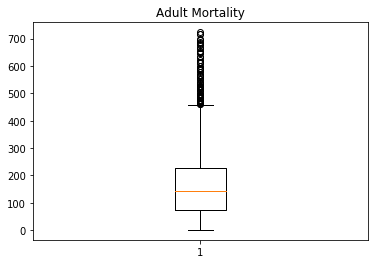

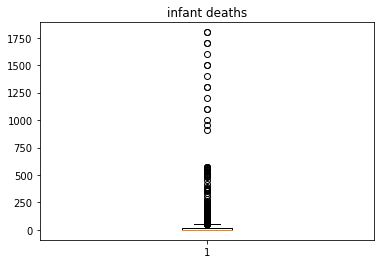

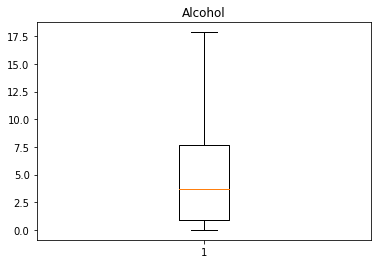

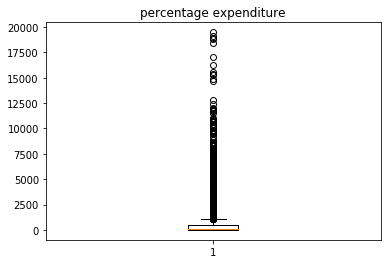

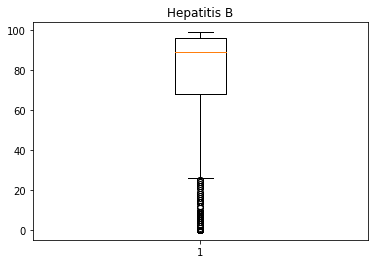

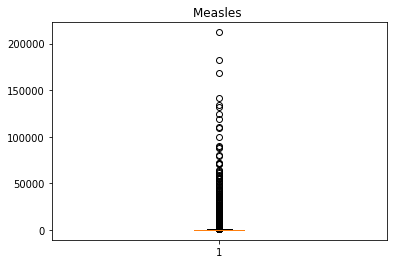

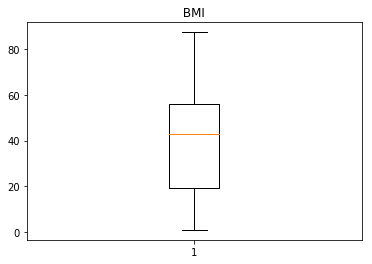

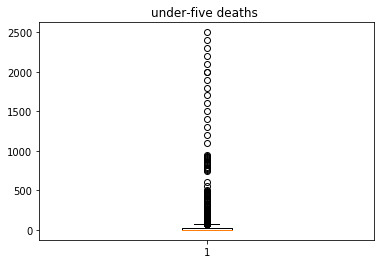

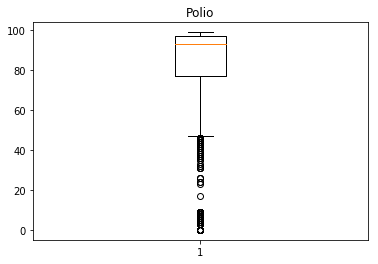

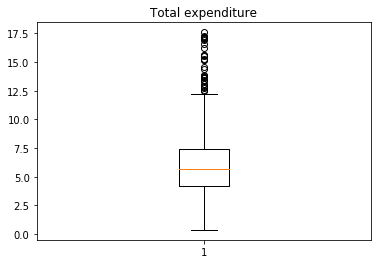

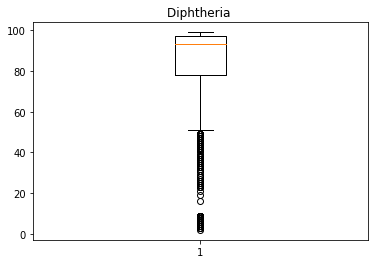

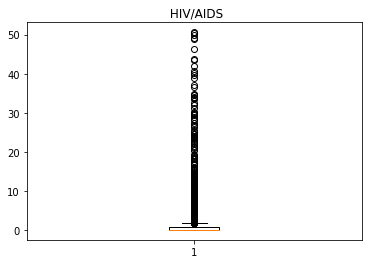

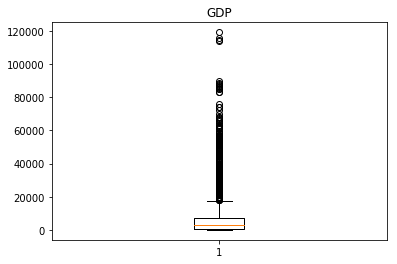

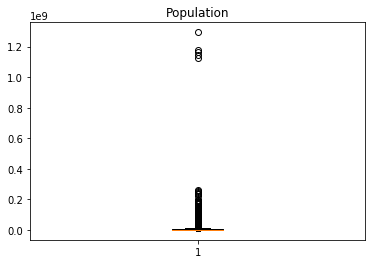

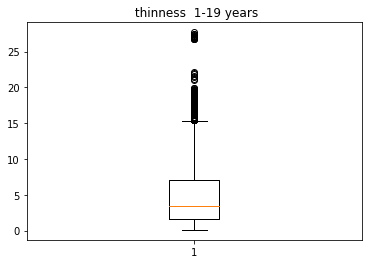

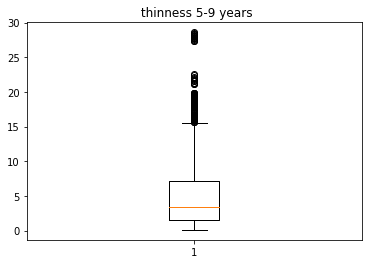

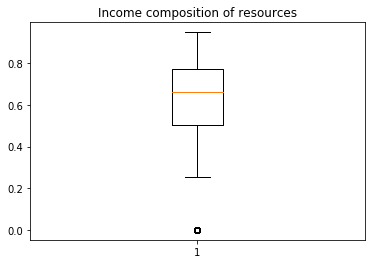

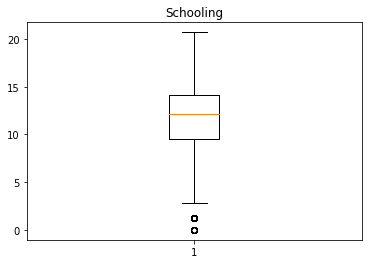

In [14]:
from scipy.stats.mstats import winsorize
for i in cols[3:]:
    plot.figure()
    plot.boxplot(data[i])
    plot.title(i)

<b><font color='red'>Some features cause problem</font><b>  

In [15]:
from scipy.stats.mstats import winsorize
data['Life expectancy ']= winsorize(data['Life expectancy '],(0.01,0))
data['Adult Mortality'] = winsorize(data['Adult Mortality'],(0,0.03))
data['infant deaths'] = winsorize(data['infant deaths'],(0,0.10))
data['percentage expenditure'] = winsorize(data['percentage expenditure'],(0,0.12))
data['under-five deaths '] = winsorize(data['under-five deaths '],(0,0.12))
data['Polio'] = winsorize(data['Polio'],(0.09,0))
data['Diphtheria '] = winsorize(data['Diphtheria '],(0.10,0))
data[' HIV/AIDS'] = winsorize(data[' HIV/AIDS'],(0,0.16))
data['GDP']= winsorize(data['GDP'],(0,0.13))
data['Population']= winsorize(data['Population'],(0,0.14))
data[' thinness  1-19 years']= winsorize(data[' thinness  1-19 years'],(0,0.04))
data[' thinness 5-9 years']= winsorize(data[' thinness 5-9 years'],(0,0.04))
data['Income composition of resources']= winsorize(data['Income composition of resources'],(0.05,0))
data['Schooling']= winsorize(data['Schooling'],(0.02,0.01))

<b><font color='green'>Outlier Resolve</font><b>

In [16]:
col_dict = {'Life expectancy ':1, 'Adult Mortality':2,
       'infant deaths':3, 'Alcohol':4, 'percentage expenditure':5, 'Hepatitis B':6,
       'Measles ':7, ' BMI ':8, 'under-five deaths ':9, 'Polio':10, 'Total expenditure':11,
       'Diphtheria ':12, ' HIV/AIDS':13, 'GDP':14, 'Population':15,
       ' thinness  1-19 years':16, ' thinness 5-9 years':17,
       'Income composition of resources':18, 'Schooling':19}
import numpy as np
for variable in col_dict.keys():
    q75, q25 = np.percentile(data[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((data[variable] > max_val) | 
                                                                                           (data[variable] < min_val))[0])),len((np.where((data[variable] > max_val) | 
                                                                                           (data[variable] < min_val))[0]))*100/1987))


Number of outliers and percentage of it in Life expectancy  : 0 and 0.0
Number of outliers and percentage of it in Adult Mortality : 0 and 0.0
Number of outliers and percentage of it in infant deaths : 315 and 15.853044791142425
Number of outliers and percentage of it in Alcohol : 0 and 0.0
Number of outliers and percentage of it in percentage expenditure : 389 and 19.577252138902868
Number of outliers and percentage of it in Hepatitis B : 346 and 17.413185707096126
Number of outliers and percentage of it in Measles  : 542 and 27.27730246602919
Number of outliers and percentage of it in  BMI  : 0 and 0.0
Number of outliers and percentage of it in under-five deaths  : 394 and 19.828887770508302
Number of outliers and percentage of it in Polio : 271 and 13.638651233014595
Number of outliers and percentage of it in Total expenditure : 33 and 1.6607951685958733
Number of outliers and percentage of it in Diphtheria  : 309 and 15.551082033215904
Number of outliers and percentage of it in  HI

<b><font color='green'>Some Outlier are there but they will not affect the model</font><b>

## 3.Model Evaluation

Importing certain modules.

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor

Next few cells contain 3 functions<ol><li><u>Implement Random forest Regressor</u> :- Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.</li><li><u>Implement Linear Regression</u> :- a linear regression model assumes that the relationship between the dependent variable y and the p-vector of regressors x is linear.</li><li><u>Checking accuracy</u> :- This has 3 types of method to check error -  <ul><li><b>MSE</b>- The average squared difference between the estimated values and the actual value</li>
    <li><b>RMSE</b>- The RMSE is also known as the quadratic mean and is a particular case of the generalized mean with exponent 2.</li>
    <li><b>MAE</b>- The average squared of absolute difference between the estimated values and the actual value</li></ul></li></ol>

In [18]:

def test_acc(y_test,y_pred):
    t=0
    ins=pd.DataFrame()
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

<b>Create Frames and split main data frame</b>  
1. Create x and y data frame to seperate the input and output.
2. Split the x , y to train and test.

In [19]:
y=pd.DataFrame()
x=pd.DataFrame()
y['Life expectancy ']=data['Life expectancy ']
x=data.drop(['Country','Life expectancy ','Alcohol','Measles ', 'Hepatitis B','Population', 'Total expenditure'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


In [20]:
x.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths',
       'percentage expenditure', ' BMI ', 'under-five deaths ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<b>Function call to calculate the accuracy. </b>

In [21]:
#Random Forest
tree=RandomForestRegressor(n_estimators=120,random_state=62)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print('Random Forest :-')
test_acc(y_test,y_pred)
tree_pred=y_pred

# Linear Regression
linr=LinearRegression()
linr.fit(x_train,y_train)
y_pred=linr.predict(x_test)
print('Linear Regression')
test_acc(y_test,y_pred)
line_pred=y_pred


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Random Forest :-
MAE: 1.0312329931972817
MSE: 2.6508897510393004
RMSE: 1.628155321533944
Linear Regression
MAE: 2.6518391131318677
MSE: 12.58433642719656
RMSE: 3.5474408278640195


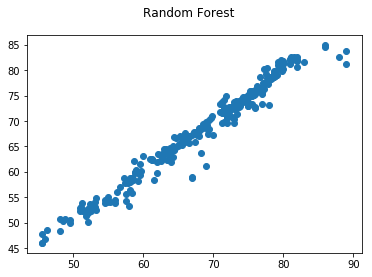

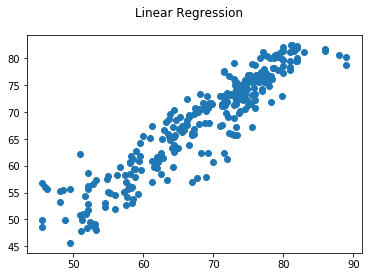

In [22]:
plot.figure().suptitle('Random Forest')
plot.scatter(y_test,tree_pred)
plot.figure().suptitle('Linear Regression')
plot.scatter(y_test,line_pred)

<b><font color='green'>This is not final value ,Final values calculated by <font color='red'>100</font> because we have scale down the "Life Expectance" </font></b>

## 4. Predict Final value by code 

In [25]:
!pip install watson-machine-learning-client

In [26]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-29 05:59:55,753 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [27]:
wml_credentials={
  "apikey": "bKsuvF3XBaH5-AxS7TxcW_Dy7DXsD64he__S8sOyudt1",
  "instance_id": "4438f8e2-b4dd-4a9b-99fe-f31997698fe8",
  "url": "https://eu-gb.ml.cloud.ibm.com",
}

In [28]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [29]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "sid", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "si05202000117@smartinternz.com", 
               client.repository.ModelMetaNames.NAME: "data"}

In [30]:
model_artifact =client.repository.store_model(tree, meta_props=model_props)

In [31]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [32]:
published_model_uid

'2e52c410-72a1-4b6f-b235-f8ed369c9220'

In [33]:
deployment = client.deployments.create(published_model_uid, name="data")



#######################################################################################

Synchronous deployment creation for uid: '2e52c410-72a1-4b6f-b235-f8ed369c9220' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0679bfd1-d07e-47c7-a1e2-a2384fca1939'
------------------------------------------------------------------------------------------------




In [34]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [35]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4438f8e2-b4dd-4a9b-99fe-f31997698fe8/deployments/0679bfd1-d07e-47c7-a1e2-a2384fca1939/online'